In [2]:
import importlib
import json
import matplotlib.pyplot as plt
import os
import pickle
import photogrammetry as pg

plt.style.use('seaborn-poster')
# plt.style.use('default')
%matplotlib inline
%matplotlib widget

In [3]:
importlib.reload(pg)

<module 'photogrammetry' from '/home/evanmayer/github/hotspot/verification/photogrammetry.py'>

In [4]:
# check for pickled camera matrices to avoid expensive recalibration
if not (
    os.path.exists('camera_cal_mtx.pickle') and
    os.path.exists('camera_cal_dist.pickle') and
    os.path.exists('camera_cal_optimal_camera_matrix.pickle')
):
    # calibrate the camera for distortion
    mtx, dist, optimal_camera_matrix, roi = pg.calibrate_camera(
        os.path.join('input', 'camera_cal'),
        method='charuco',
        plot=False
    )
    with open('camera_cal_mtx.pickle', 'wb') as f:
        pickle.dump(mtx, f, protocol=pickle.HIGHEST_PROTOCOL)
    with open('camera_cal_dist.pickle', 'wb') as f:
        pickle.dump(dist, f, protocol=pickle.HIGHEST_PROTOCOL)
    with open('camera_cal_optimal_camera_matrix.pickle', 'wb') as f:
        pickle.dump(optimal_camera_matrix, f, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open('camera_cal_mtx.pickle', 'rb') as f:
        mtx = pickle.load(f)
    with open('camera_cal_dist.pickle', 'rb') as f:
        dist = pickle.load(f)
    with open('camera_cal_optimal_camera_matrix.pickle', 'rb') as f:
        optimal_camera_matrix = pickle.load(f)

In [11]:
importlib.reload(pg)
image_data_charuco = pg.find_targets(
    os.path.join('input', 'meas', '20220802', '7x7_0.30x0.30_20220802_r1'),
    os.path.join('input', 'targets'),
    mtx,
    dist,
    optimal_camera_matrix,
    stride=1,
    plot=False
)

INFO:photogrammetry:Corner detection after de-distortion in input/meas/20220802/7x7_0.30x0.30_20220802_r1/13.jpg: True
INFO:photogrammetry:Corner detection after de-distortion in input/meas/20220802/7x7_0.30x0.30_20220802_r1/1.jpg: True
INFO:photogrammetry:Corner detection after de-distortion in input/meas/20220802/7x7_0.30x0.30_20220802_r1/12.jpg: True
INFO:photogrammetry:Corner detection after de-distortion in input/meas/20220802/7x7_0.30x0.30_20220802_r1/11.jpg: True
INFO:photogrammetry:Corner detection after de-distortion in input/meas/20220802/7x7_0.30x0.30_20220802_r1/10.jpg: True
INFO:photogrammetry:Corner detection after de-distortion in input/meas/20220802/7x7_0.30x0.30_20220802_r1/15.jpg: True
INFO:photogrammetry:Corner detection after de-distortion in input/meas/20220802/7x7_0.30x0.30_20220802_r1/14.jpg: True
INFO:photogrammetry:Corner detection after de-distortion in input/meas/20220802/7x7_0.30x0.30_20220802_r1/16.jpg: True
INFO:photogrammetry:Corner detection after de-dis

In [6]:
# plt.close('all')

In [7]:
# print(image_data_charuco)

RMSE: 0.0017874607652687685
0 x-measurements with >6x RMSE ignored (highlighted red).
0 y-measurements with >6x RMSE ignored (highlighted red).


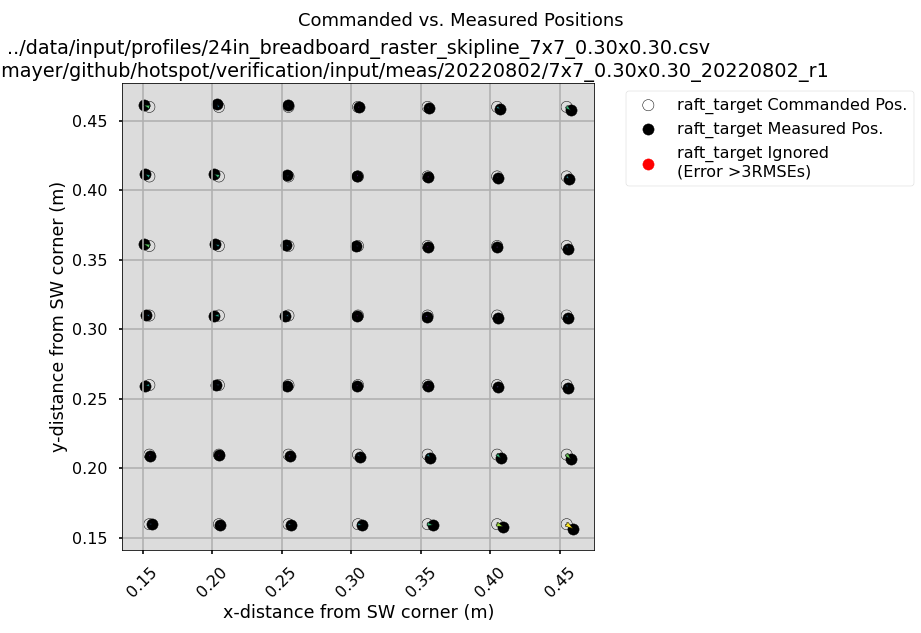

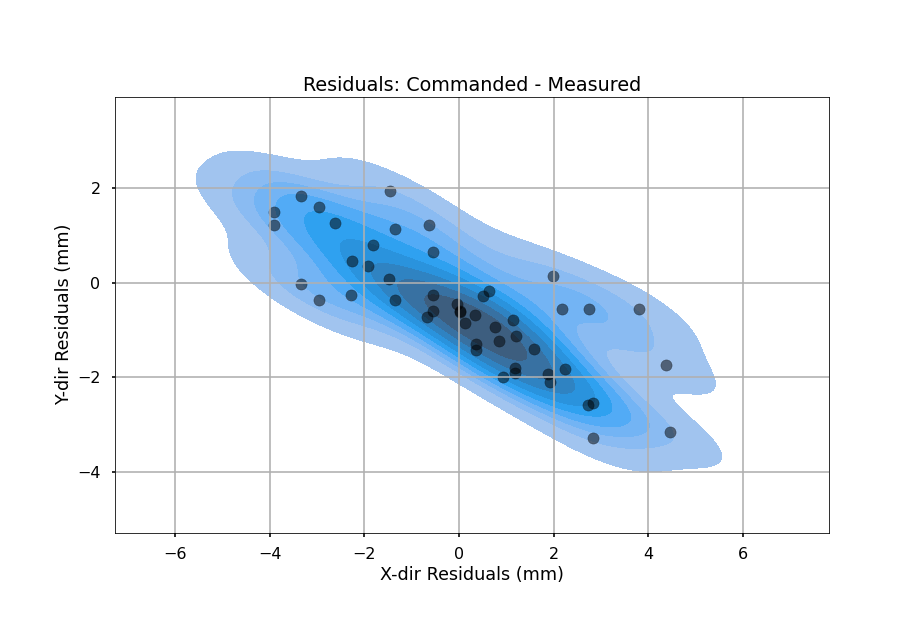

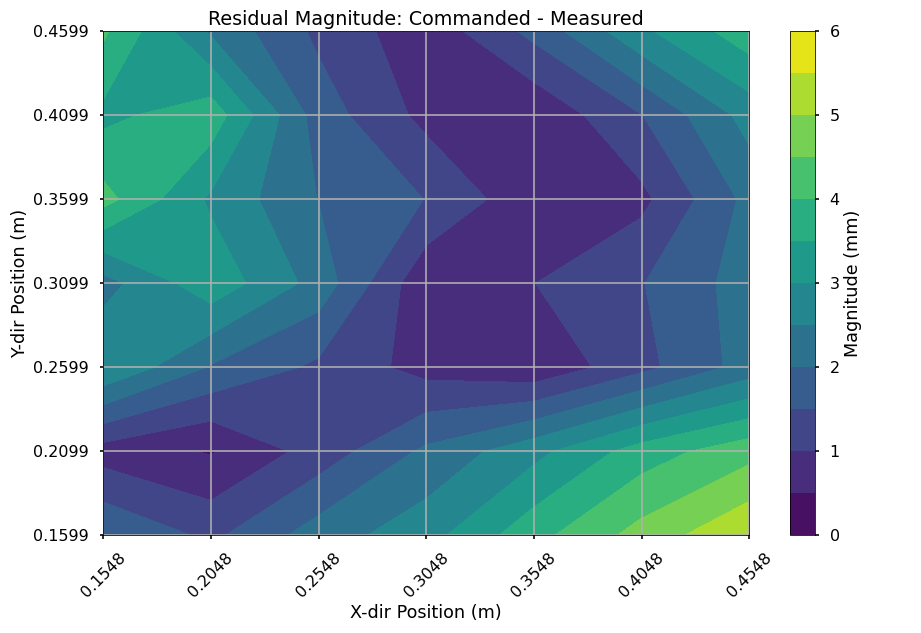

In [13]:
importlib.reload(pg)
command_file = os.path.join('..', 'data', 'input', 'profiles', '24in_breadboard_raster_skipline_7x7_0.30x0.30.csv')
pg.post_process_many_to_many(image_data_charuco, command_file, ref='SW', SW_offset=(.05822, .18449))
# pg.post_process_many_to_one(image_data_charuco)

In [ ]:
# with open('output/18x18_.2x.2_20220721_r1_location_data.json', mode='w') as f:
#     s = json.dumps(image_data_charuco)
#     f.write(s)

In [14]:
pixel_scales = []
for img, img_data in image_data_charuco.items():
    if os.path.exists(img):
        pixel_scales.append(img_data['px_per_m'])

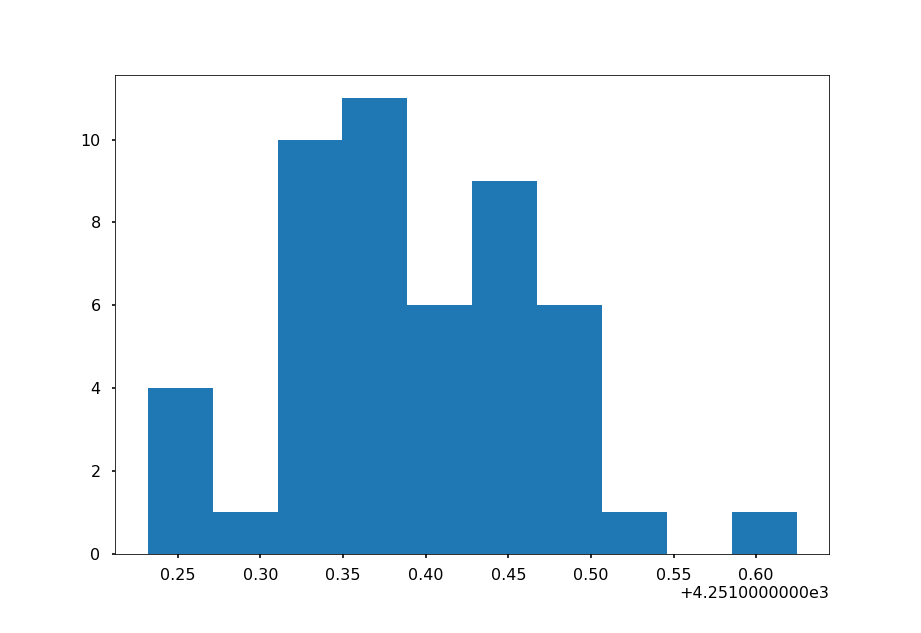

: 

In [15]:
f = plt.figure()
ax = plt.axes()
ax.hist(pixel_scales)
plt.show()